# Comprehensive Analysis of Electronic Health Record Data using Python

In [275]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy.stats import chi2_contingency

## Basic Analysis and understanding of the data

In [2]:
# Load the datasets
patients = pd.read_csv(r"D:\DSML class\Real world data assignments\Python\EHR Analysis\Data\PATIENTS.csv")
admissions = pd.read_csv(r"D:\DSML class\Real world data assignments\Python\EHR Analysis\Data\ADMISSIONS.csv")
diagnosis = pd.read_csv(r"D:\DSML class\Real world data assignments\Python\EHR Analysis\Data\DIAGNOSES_ICD.csv")
icd = pd.read_csv(r"D:\DSML class\Real world data assignments\Python\EHR Analysis\Data\D_ICD_DIAGNOSES.csv")

## Observation of the data

In [3]:
print('\nFirst five rows of the Patients table')
patients.head(5)


First five rows of the Patients table


,row_id,subject_id,gender,dob
0,9467,10006,F,2094-03-05 0:00:00
1,9472,10011,F,2090-06-05 0:00:00
2,9474,10013,F,2038-09-03 0:00:00
3,9478,10017,F,2075-09-21 0:00:00
4,9479,10019,M,2114-06-20 0:00:00


In [4]:
patients.shape

(100, 4)

In [5]:
print('\nFirst five rows of the Admissions table')
admissions.head(5)


First five rows of the Admissions table


,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1


In [6]:
admissions.shape

(129, 17)

In [7]:
print('\nFirst five rows of the Diagnosis table')
diagnosis.head(5)


First five rows of the Diagnosis table


,row_id,subject_id,hadm_id,icd9_code
0,112344,10006,142345,99591
1,112345,10006,142345,99662
2,112346,10006,142345,5672
3,112347,10006,142345,40391
4,112348,10006,142345,42731


In [8]:
diagnosis.shape

(1761, 4)

In [9]:
print('\nFirst five rows of the ICD codes table')
icd.head(5)


First five rows of the ICD codes table


,row_id,icd9_code,short_title,long_title
0,1,01716,Erythem nod tb-oth test,Erythema nodosum with hypersensitivity reactio...
1,2,01720,TB periph lymph-unspec,"Tuberculosis of peripheral lymph nodes, unspec..."
2,3,01721,TB periph lymph-no exam,"Tuberculosis of peripheral lymph nodes, bacter..."
3,4,01722,TB periph lymph-exam unk,"Tuberculosis of peripheral lymph nodes, bacter..."
4,5,01723,TB periph lymph-micro dx,"Tuberculosis of peripheral lymph nodes, tuberc..."


In [10]:
icd.shape

(14567, 4)

In [11]:
#Getting the overview of the dataset structure
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   row_id      100 non-null    int64 
 1   subject_id  100 non-null    int64 
 2   gender      100 non-null    object
 3   dob         100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [12]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                129 non-null    int64 
 1   subject_id            129 non-null    int64 
 2   hadm_id               129 non-null    int64 
 3   admittime             129 non-null    object
 4   dischtime             129 non-null    object
 5   deathtime             40 non-null     object
 6   admission_type        129 non-null    object
 7   admission_location    129 non-null    object
 8   insurance             129 non-null    object
 9   language              81 non-null     object
 10  religion              128 non-null    object
 11  marital_status        113 non-null    object
 12  ethnicity             129 non-null    object
 13  edregtime             92 non-null     object
 14  edouttime             92 non-null     object
 15  diagnosis             129 non-null    ob

In [13]:
diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   row_id      1761 non-null   int64 
 1   subject_id  1761 non-null   int64 
 2   hadm_id     1761 non-null   int64 
 3   icd9_code   1761 non-null   object
dtypes: int64(3), object(1)
memory usage: 55.2+ KB


In [14]:
icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14567 entries, 0 to 14566
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       14567 non-null  int64 
 1   icd9_code    14567 non-null  object
 2   short_title  14567 non-null  object
 3   long_title   14567 non-null  object
dtypes: int64(1), object(3)
memory usage: 455.3+ KB


In [15]:
#Checking the summary of numerical columns in admissions table
admissions.describe()

,row_id,subject_id,hadm_id,hospital_expire_flag
count,129.000000,129.000000,129.000000,129.000000
mean,28036.441860,28010.410853,152343.441860,0.310078
std,14036.548988,16048.502883,27858.788248,0.464328
min,12258.000000,10006.000000,100375.000000,0.000000
25%,12339.000000,10088.000000,128293.000000,0.000000
50%,39869.000000,40310.000000,157235.000000,0.000000
75%,40463.000000,42135.000000,174739.000000,1.000000
max,41092.000000,44228.000000,199395.000000,1.000000


In [16]:
#Unique values and it's count unique of all columns
print('\nUnique values of categorical columns in admissions table')
(admissions.select_dtypes(include='object')).nunique()


Unique values of categorical columns in admissions table


admittime             129
dischtime             129
deathtime              40
admission_type          3
admission_location      5
insurance               4
language                5
religion               10
marital_status          6
ethnicity               9
edregtime              92
edouttime              92
diagnosis              95
dtype: int64

In [17]:
print('\nUnique values of all columns in patients table')
patients.nunique()


Unique values of all columns in patients table


row_id        100
subject_id    100
gender          2
dob            99
dtype: int64

In [18]:
print('\nUnique values of categorical columns in diagnosis table')
(diagnosis.select_dtypes(include='object')).nunique()


Unique values of categorical columns in diagnosis table


icd9_code    580
dtype: int64

In [19]:
print('\nUnique values of categorical columns in icd table')
(icd.select_dtypes(include='object')).nunique()


Unique values of categorical columns in icd table


icd9_code      14567
short_title    14328
long_title     14562
dtype: int64

### Insights:
- The given dataset contains the data of 100 unique patients.
- The total number of icd9 codes provided is 14567 where as only 580 codes are being used in the data.

## Data Processing

In [20]:
#Checking for missing values
patients.isna().sum()

row_id        0
subject_id    0
gender        0
dob           0
dtype: int64

In [21]:
admissions.isna().sum()

row_id                   0
subject_id               0
hadm_id                  0
admittime                0
dischtime                0
deathtime               89
admission_type           0
admission_location       0
insurance                0
language                48
religion                 1
marital_status          16
ethnicity                0
edregtime               37
edouttime               37
diagnosis                0
hospital_expire_flag     0
dtype: int64

In [22]:
diagnosis.isna().sum()

row_id        0
subject_id    0
hadm_id       0
icd9_code     0
dtype: int64

In [23]:
icd.isna().sum()

row_id         0
icd9_code      0
short_title    0
long_title     0
dtype: int64

In [24]:
# Duplicate entry check
patients[patients.duplicated()]

,row_id,subject_id,gender,dob


In [25]:
admissions[admissions.duplicated()]

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag


In [26]:
diagnosis[diagnosis.duplicated()]

,row_id,subject_id,hadm_id,icd9_code


In [27]:
icd[icd.duplicated()]

,row_id,icd9_code,short_title,long_title


In [28]:
#Converting date columns type from object to datetime
patients['dob'] = pd.to_datetime(patients['dob'])
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])
admissions['deathtime'] = pd.to_datetime(admissions['deathtime'])
admissions['edregtime'] = pd.to_datetime(admissions['edregtime'])
admissions['edouttime'] = pd.to_datetime(admissions['edouttime'])

## Demographic Analysis

In [29]:
#Joining the Patients table and Admissions table for further analysis
admpt = admissions.merge(patients[['subject_id', 'gender', 'dob']], how='left',on='subject_id')

In [30]:
#Creating the age column using dob and admittime
admpt['age'] = admpt['admittime'].dt.year - admpt['dob'].dt.year

In [31]:
#Converting age = 300 to 89
admpt['age'] = admpt['age'].apply(lambda x: 89 if x == 300 else x)

In [32]:
admpt['agegroup'] = pd.cut(admpt['age'], bins=[0,30, 60, 70, 80, 100], labels=['0-30', '31-60', '61-70', '71-80', '>80'])

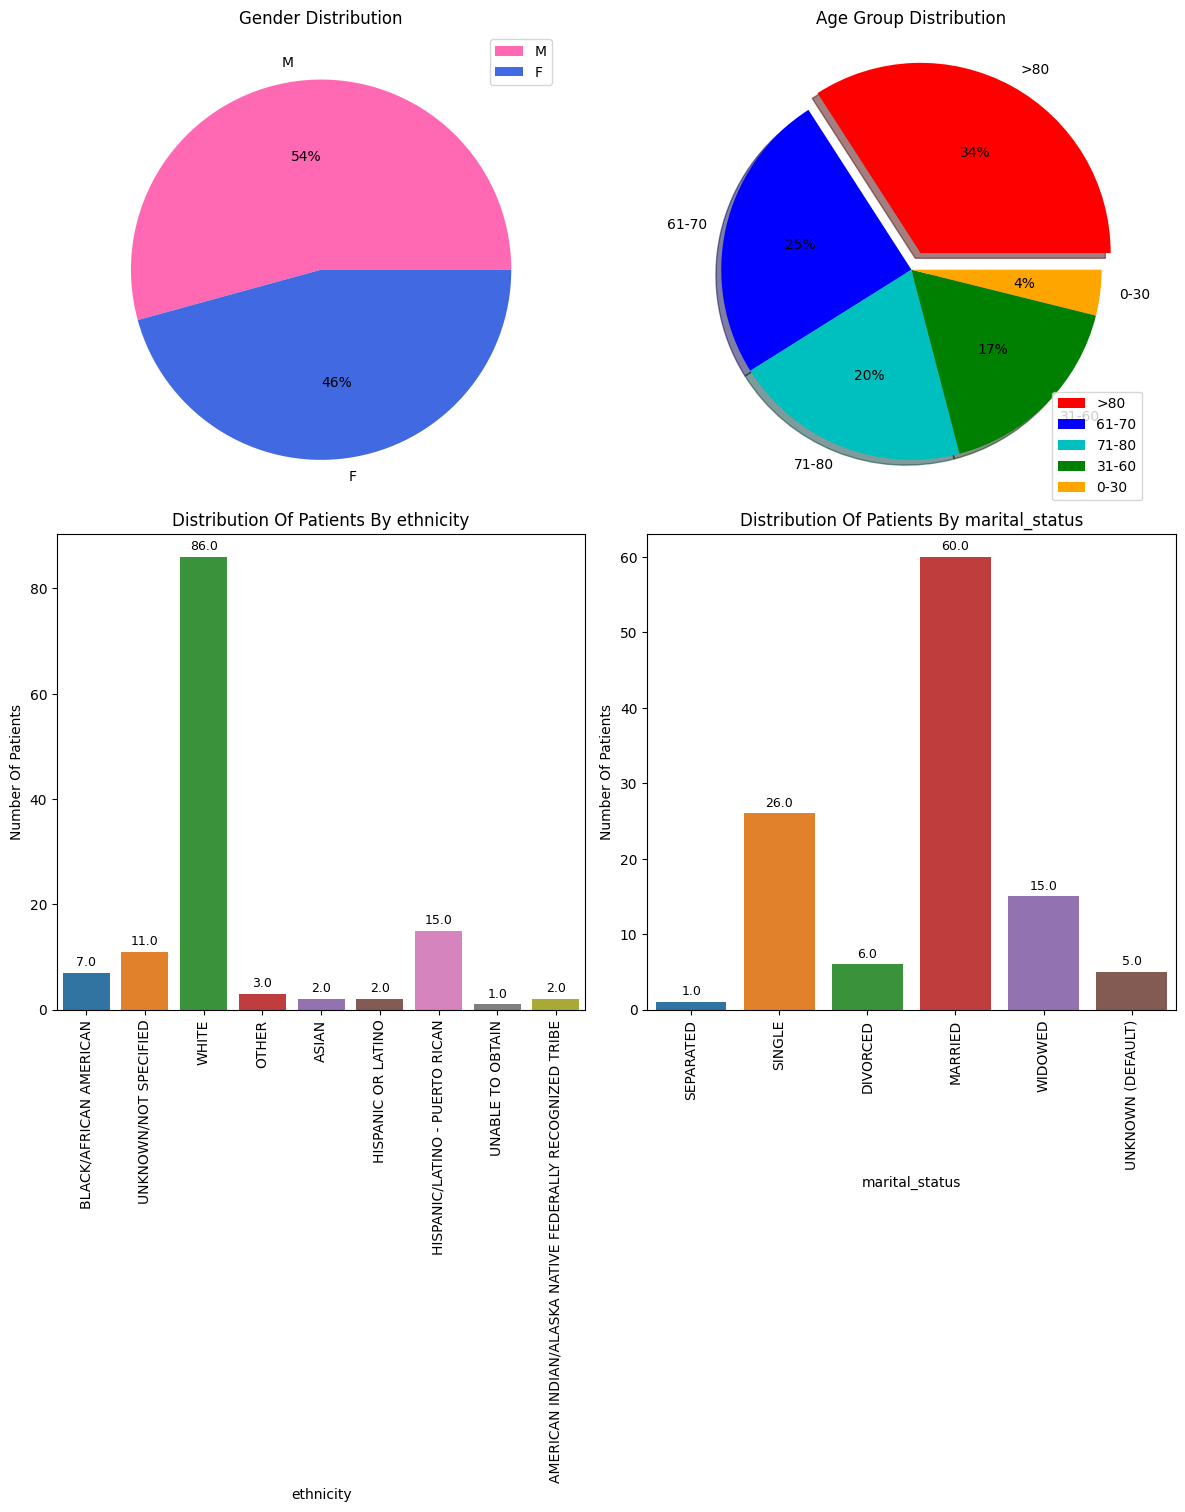

In [33]:
# Plotting the distribution of Gender, Age group, Ethnicity and Marital status
plt.figure(figsize=(12,15))
columns = ['ethnicity', 'marital_status']
plt.subplot(2,2,1)
admpt['gender'].value_counts().plot(kind='pie',
                                         autopct='%1.0f%%',
                                         colors=['hotpink', 'royalblue'],
                                         legend=True,
                                         ylabel='')
plt.title('Gender Distribution')

plt.subplot(2,2,2)
admpt['agegroup'].value_counts().plot(kind='pie',
                                           autopct='%1.0f%%',
                                           legend=True,
                                           explode = (0.1, 0, 0, 0, 0),
                                           colors=['r','b','c','g', 'orange'],
                                           shadow=True,
                                           ylabel='')
plt.title('Age Group Distribution')

for i, column in enumerate(columns, 3):
    plt.subplot(2,2,i)
    ax = sns.countplot(data=admpt, x=column)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.title(f'Distribution Of Patients By {column}')
    plt.xlabel(column)
    plt.ylabel('Number Of Patients')
    plt.xticks(rotation=90)
plt.tight_layout(h_pad=4)
plt.show()


## Admission Characteristics

### Readmission Rate

In [34]:
print('\nReadmission pattern')
admpt.groupby('subject_id').agg({'admittime': 'count'}).reset_index().rename({'admittime': 'admissioncount'}, axis=1)['admissioncount'].value_counts()


Readmission pattern


1     86
2     11
3      2
15     1
Name: admissioncount, dtype: int64

### Insights:
- One patient was admitted 15 times to the hospital and two patients were admitted three times.
- Eleven patients were admitted twice and rest of the patients were admitted only once.
- The data shows that the redmission rates are pretty less provided a few number of patients were admitted more than once. 

### Admission type frequency

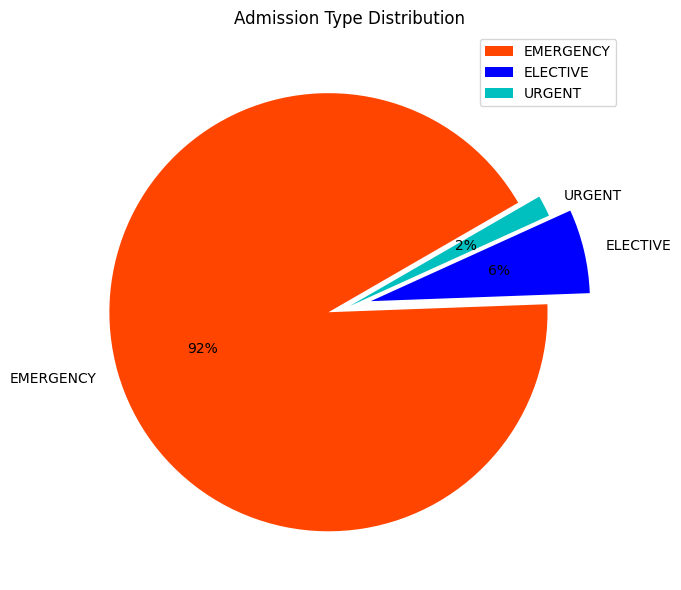

In [35]:
plt.figure(figsize=(8,6))
admpt['admission_type'].value_counts().plot(kind='pie',
                                           autopct='%1.0f%%',
                                           legend=True,
                                           explode = (0.1, 0.1, 0),
                                           colors=['orangered','b','c'],
                                            startangle=30,
                                           ylabel='')
plt.title('Admission Type Distribution')
plt.tight_layout()
plt.show()

### Insights:
- 92% of the admission types of the given dataset is emergency.
- Only 2% of the admissions are urgent and 6% are elective.

## Diagnosis Analysis

### Most Frequent ICD9 Diagnosis

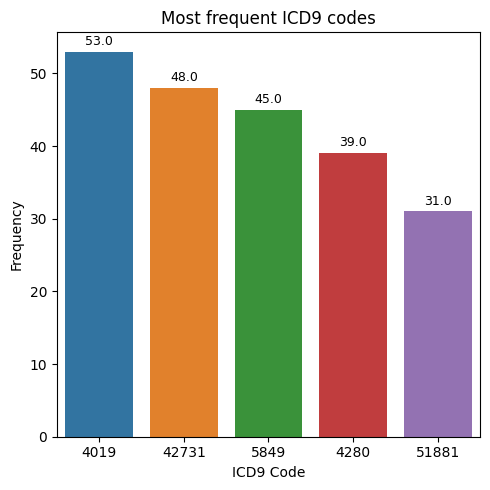

In [107]:
d = diagnosis.groupby('icd9_code').agg({'subject_id': 'count'}).reset_index().rename({'subject_id': 'frequency'}, axis=1).sort_values(by='frequency', ascending=False).head(5)
plt.figure(figsize=(5,5))
ax = sns.barplot(data=d, x='icd9_code', y='frequency')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.title('Most frequent ICD9 codes')
plt.xlabel('ICD9 Code')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Insights:
- The most frequent ICD9 diagnosis is 4019 wich was diagnosed 53 times.
- The top 5 frequent ICD9 diagnosis are 4019, 42731, 5849, 4280 and 51881 with a frequency of 53, 48, 45, 39 and 31 times diagnosed respectively.


## Associations between Diagnosis and Patient Outcomes

### Diagnosis vs Length of stay

In [141]:
#Creating the length of stay column form discchrge time and admit time
admpt['stay_length'] = (admpt['dischtime'] - admpt['admittime']).astype('timedelta64[D]').astype(int)

In [143]:
#Joining the Patients table, Admissions table and Diagnosis for further analysis
admptdiag = admpt.merge(diagnosis[['hadm_id', 'icd9_code']], how='right', on='hadm_id')

In [205]:
# Association between diagnosis and length of stay
admptdiag.groupby(['diagnosis']).agg({'stay_length':'max', 'subject_id': 'nunique', 'icd9_code': 'nunique'}).reset_index().sort_values(by='stay_length', ascending=False)

,diagnosis,stay_length,subject_id,icd9_code
28,FACIAL NUMBNESS,123,1,36
26,ESOPHAGEAL CA/SDA,39,2,19
5,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,36,1,24
46,LIVER FAILURE,35,2,26
72,SEIZURE;STATUS EPILEPTICUS,32,1,19
...,...,...,...,...
57,PLEURAL EFFUSION,0,1,8
79,STEMI;,0,1,14
78,STATUS POST MOTOR VEHICLE ACCIDENT WITH INJURIES,0,1,5
60,PNEUMONIA;TELEMETRY,0,1,9


### Insights:
- A paatient with Facial Numbness diagnosis was admitted with 36 different ICD9 codes with a stay length of 123 days which is the highest of all admissions.
- The diagnosis ESOPHAGEAL CA/SDA has the second highest stay length with 39 days.

### Diagnosis vs Readmission Rate

In [242]:
#Top 5 diagnosis with highest readmission rates
top5readm = admpt.groupby(['diagnosis', 'subject_id']).agg({'hadm_id': 'count'}).reset_index().rename({'hadm_id': 'readmissions'}, axis=1).sort_values(by='readmissions', ascending=False).head(5)
top5readm

,diagnosis,subject_id,readmissions
93,SEPSIS,41976,5
70,PNEUMONIA,41976,4
36,FEVER,10117,2
11,ASTHMA;CHRONIC OBST PULM DISEASE,41795,2
0,ABDOMINAL PAIN,40687,1


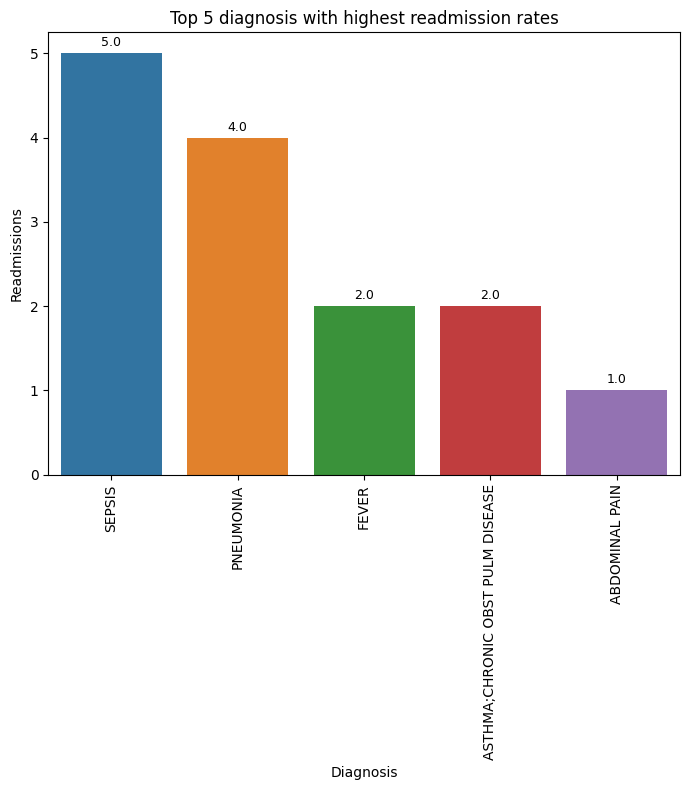

In [247]:
plt.figure(figsize=(7,8))
ax = sns.barplot(data=top5readm, x='diagnosis', y='readmissions')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.title('Top 5 diagnosis with highest readmission rates')
plt.xlabel('Diagnosis')
plt.ylabel('Readmissions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Mortality Analysis

### Mortality Rates for Different Diagnosis and Admission Types

In [268]:
admpt.groupby(['diagnosis', 'admission_type']).agg({'hospital_expire_flag': 'sum'}).reset_index().sort_values(by='hospital_expire_flag', ascending=False).rename({'hospital_expire_flag':'no_of_deaths'}, axis=1).head(40)

,diagnosis,admission_type,no_of_deaths
22,CONGESTIVE HEART FAILURE,EMERGENCY,2
46,LIVER FAILURE,EMERGENCY,2
73,SEPSIS,EMERGENCY,2
30,FEVER,EMERGENCY,2
0,ABDOMINAL PAIN,EMERGENCY,1
71,SEIZURE,EMERGENCY,1
35,HEPATITIS B,EMERGENCY,1
39,HYPOTENSION,EMERGENCY,1
43,INFERIOR MYOCARDIAL INFARCTION\CATH,EMERGENCY,1
48,LUNG CANCER;SHORTNESS OF BREATH,EMERGENCY,1


### Insights:
- Most of the deaths happened with the admission type Emergency.
- Congestive heart failure, liver failure, sepsis and fever has the highest number of deaths of 2 in each. 

## Correlations between Patient Demographics and Mortality Rates

### Gender vs Mortality rates

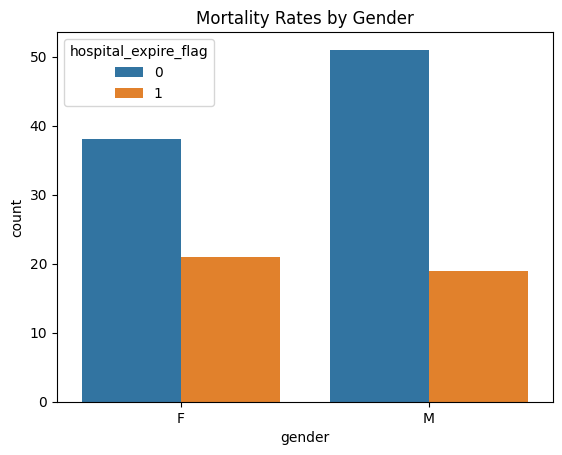

In [271]:
# Visualize mortality rates by gender
sns.countplot(data=admpt, x="gender", hue="hospital_expire_flag")
plt.title("Mortality Rates by Gender")
plt.show()

In [285]:
# Chi-square test for gender and mortality
gender_mortality_contingency = pd.crosstab(admpt["gender"], admpt["hospital_expire_flag"])
chi2, p, _, _ = chi2_contingency(gender_mortality_contingency)
print("Chi-square p-value for gender and mortality:", p)

Chi-square p-value for gender and mortality: 0.3993917889521913


### Insights:
- A p-value of 0.39 suggests that there is no significant association between gender and mortality rates

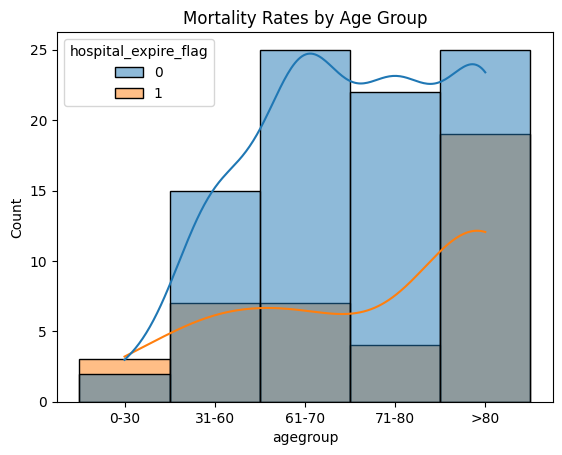

In [274]:
# Explore mortality rates by age group
sns.histplot(data=admpt, x="agegroup", hue="hospital_expire_flag", kde=True)
plt.title("Mortality Rates by Age Group")
plt.show()

In [291]:
agegroup_mortality_contingency = pd.crosstab(admpt["agegroup"], admpt["hospital_expire_flag"])
chi2, p, _, _ = chi2_contingency(agegroup_mortality_contingency)
print("Chi-square p-value for age group and mortality:", p)

Chi-square p-value for age group and mortality: 0.055517169568212364


### Insights:
- A chi-square p-value of 0.0555 suggests that there is a borderline significant association between age group and mortality rates.

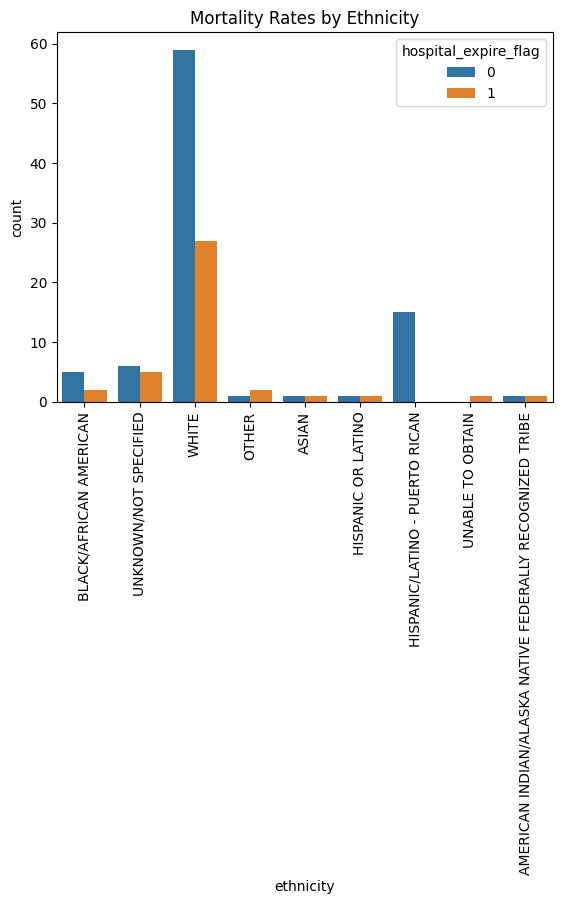

In [295]:
# Visualize mortality rates by ethicity
sns.countplot(data=admpt, x="ethnicity", hue="hospital_expire_flag")
plt.title("Mortality Rates by Ethnicity")
plt.xticks(rotation=90)
plt.show()

In [296]:
ethnicity_mortality_contingency = pd.crosstab(admpt["ethnicity"], admpt["hospital_expire_flag"])
chi2, p, _, _ = chi2_contingency(ethnicity_mortality_contingency)
print("Chi-square p-value for ethnicity and mortality:", p)

Chi-square p-value for ethnicity and mortality: 0.11675823784989112


### Insights:
- A chi-square p-value of 0.1168 suggests that there is no significant association between ethnicity and mortality rates.

## Overall Insights:

### Patient Demographics:
1. The patient population comprises 54% males and 46% females.
2. Age Distribution: 34% of the patients are aged over 80, 25% belong to the 61-70 age group, and 20% fall within the 71-80 age range.
3. Ethnicity: A significant majority (86 patients) are identified as White.
4. Marital Status: 60 patients are married, 26 are single, and 15 are widowed.

### Patient Admissions:
1. The dataset includes information on 100 unique patients.
2. A notable observation is the variability in hospital admissions among these patients; one patient was admitted 15 times, two patients were admitted three times each, eleven patients were admitted twice, and the remaining patients had a single admission.

### ICD-9 Codes Usage:
1. From a total of 14,567 ICD-9 codes available, only 580 distinct codes are utilized in the dataset.
2. The most frequently recorded ICD-9 code is 4019, documented 53 times. The other common codes include 42731, 5849, 4280, and 51881, highlighting prevalent health issues related to heart and kidney diseases.

### Admission Types:
1. The overwhelming majority of admissions (92%) were categorized as emergency, indicating urgent and unplanned medical care. Only 6% were elective, and 2% were urgent admissions.

### Length of Stay:
1. A patient diagnosed with Facial Numbness had the longest hospital stay of 123 days, associated with 36 different ICD-9 codes.
2. The second-longest stay was 39 days for a patient with the diagnosis ESOPHAGEAL CA/SDA.

### Mortality Rates and Admission Types:
1. Most in-hospital deaths occurred under emergency admissions.
2. Specific conditions such as congestive heart failure, liver failure, sepsis, and fever each recorded two deaths, indicating critical areas of concern.

### Statistical Associations:
1. Gender does not show a significant association with mortality rates (p-value: 0.39).
2. There is a borderline significant association between age groups and mortality rates (p-value: 0.0555).
3. No significant association was found between ethnicity and mortality rates (p-value: 0.1168).

## Recommendations:

### Focus on High-Risk Conditions:
- Implement targeted interventions for conditions frequently leading to readmissions (e.g., heart and kidney diseases), aiming to improve patient outcomes and reduce the burden on healthcare resources.

### Enhance Emergency Care:
- Given the high percentage of emergency admissions, enhancing emergency department efficiency and response times could potentially reduce mortality rates and improve patient care.

### Monitor and Support Frequent Admitters:
- Develop specialized care plans for patients with multiple admissions to manage their conditions more effectively, possibly involving more rigorous follow-up routines and outpatient support.

### Address Age-Specific Needs:
- Considering the borderline significance of age with mortality rates, develop age-specific medical protocols to better address the unique needs of different age groups.
